In [82]:
#Importando as bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [83]:
#Criando nosso DataFrame
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/AdventureWorks.xlsx")

In [84]:
#Vizualizando as 5 primeiras linhas.
print(df.head())

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   
1 2008-05-12 2008-05-17      306         384       19051  200805123CS567   
2 2008-05-14 2008-05-20      306         384       19052  200805143CS576   
3 2008-05-21 2008-05-27      306         384       19052  200805213CS576   
4 2008-06-20 2008-06-27      306         384       19053  200806203CS586   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   
1               348.58               758.00           6                 0.00   
2               348.58               758.00           6                 0.00   
3               348.58               758.00           6                 0.00   
4               348.58               758.00           6                 0.00   

           Valor Venda                                Produto 

In [85]:
#Quantidade de linhas e colunas.
print(df.shape)

(904, 16)


In [86]:
#Verificando os tipos de dados.
print(df.dtypes)

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object


In [87]:
#Mostrando a receita total.
print(df["Valor Venda"].sum())

5984606.1426


In [88]:
#Mostrando o custo total.
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custos.
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   

           Valor Venda                                Produto  \
0             4,548.00  Adventure Works Laptop15.4W M1548 Red   

        Fabricante            Marca   Classe  Cor                custo  
0  Adventure Works  Adventure Works  Regular  Red             2,091.48  


In [89]:
#Custo total.
round(df["custo"].sum(), 2)

2486783.05

In [90]:
#Agora que temos a receita e o custo total, podemos achar o lucro total
#Vamos criar uma coluna de lucro que será receita - custo
df["lucro"] = df["Valor Venda"] - df ["custo"]
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   

           Valor Venda                                Produto  \
0             4,548.00  Adventure Works Laptop15.4W M1548 Red   

        Fabricante            Marca   Classe  Cor                custo  \
0  Adventure Works  Adventure Works  Regular  Red             2,091.48   

                 lucro  
0             2,456.52  


In [91]:
#Total lucro.
round(df["lucro"].sum(), 2)

3497823.09

In [92]:
#Criando uma coluna com total de dias para enviar o produto.
df["Tempo-envio"] = df["Data Envio"] - df["Data Venda"]
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   

           Valor Venda                                Produto  \
0             4,548.00  Adventure Works Laptop15.4W M1548 Red   

        Fabricante            Marca   Classe  Cor                custo  \
0  Adventure Works  Adventure Works  Regular  Red             2,091.48   

                 lucro Tempo-envio  
0             2,456.52     20 days  


### Agora queremos saber a média do tempo de envio para cada marca, e para isso precisamos trasnformar a coluna Tempo_envio em númerica

In [93]:
#Extraindo apenas os dias.
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   

           Valor Venda                                Produto  \
0             4,548.00  Adventure Works Laptop15.4W M1548 Red   

        Fabricante            Marca   Classe  Cor                custo  \
0  Adventure Works  Adventure Works  Regular  Red             2,091.48   

                 lucro Tempo-envio  Tempo_envio  
0             2,456.52     20 days           20  


In [94]:
#Verificando o tipo da coluna Tempo_envio
print(df["Tempo_envio"].dtype)

int64


In [95]:
#Média do tempo de envio por marca.
print(df.groupby("Marca")["Tempo_envio"].mean())

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64


In [96]:
#Verificar se temos dados faltantes.
print(df.isnull().sum())

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo-envio       0
Tempo_envio       0
dtype: int64


### Agrupamento ano e marca

In [97]:
#Agrupando ano e marca.
print(df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum())

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64


In [98]:
pd.options.display.float_format = '{:20,.2f}'.format

In [99]:
#Restando o index.
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
print(lucro_ano)

   Data Venda            Marca                lucro
0        2008  Adventure Works           306,641.16
1        2008          Contoso            56,416.00
2        2008         Fabrikam         1,557,020.55
3        2009  Adventure Works           405,395.08
4        2009          Contoso           138,258.95
5        2009         Fabrikam         1,034,091.35


In [100]:
#Total de produtos vendidos.
print(df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False))

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0, 'Produto')

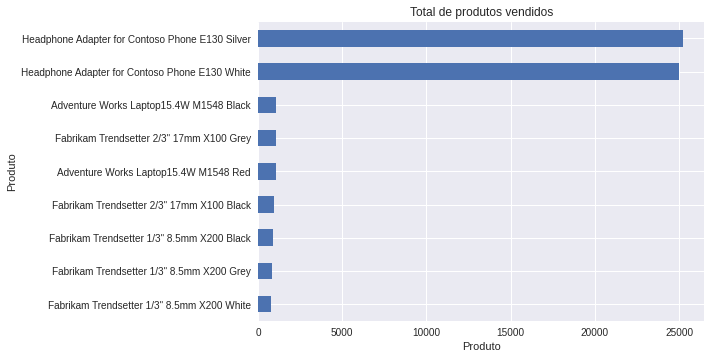

In [101]:
#Gráfico total de produtos vendidos.
print(df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos"))
plt.xlabel("Total")
plt.xlabel("Produto")

AxesSubplot(0.125,0.125;0.775x0.755)


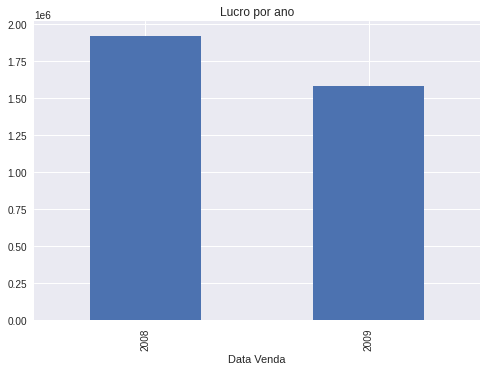

In [102]:
#Pegando lucro por ano.
print(df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro por ano"))

In [103]:
#Selecionando apenas as vendas de 2009.
df_2009 = df[df["Data Venda"].dt.year == 2009]
print(df_2009)

    Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
11  2009-05-02 2009-05-14      199         384       18938  200905023CS847   
12  2009-05-16 2009-05-27      306         384       19067  200905163CS746   
13  2009-05-31 2009-06-12      306         384       19068  200905313CS748   
14  2009-06-28 2009-07-11      199         384       18959  200906283CS870   
15  2009-07-08 2009-07-12      306         384       19070  200907083CS757   
..         ...        ...      ...         ...         ...             ...   
890 2009-12-23 2009-12-30      199        1155       19033  200912234CS949   
895 2009-01-11 2009-01-18      307        1155       19113  200901114CS680   
896 2009-03-04 2009-03-15      307        1155       19117  200903044CS706   
897 2009-06-12 2009-06-22      307        1226       19126  200906124CS716   
898 2009-06-25 2009-07-06      307        1155       19127  200906254CS717   

          Custo Unitário       Preço Unitário  Quantidade  \
11

Text(0, 0.5, 'Lucro')

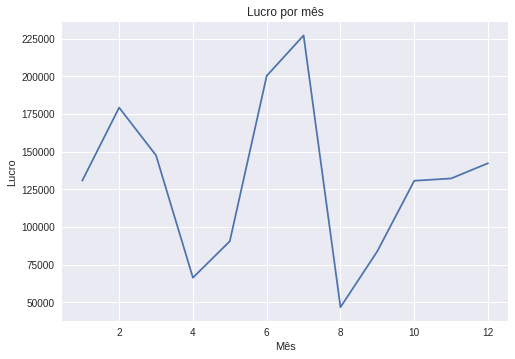

In [104]:
#Retornando o lucro por mês.
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro por mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

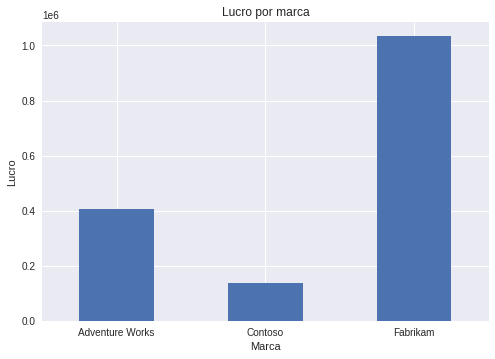

In [105]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro por marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

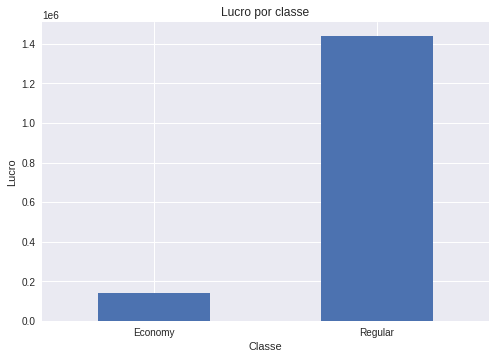

In [106]:
#Retornando o lucro por classe.
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro por classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

In [108]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D object at 0x7efce0509ed0>, <matplotlib.lines.Line2D object at 0x7efce050d450>], 'caps': [<matplotlib.lines.Line2D object at 0x7efce050d990>, <matplotlib.lines.Line2D object at 0x7efce050ded0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7efce0509950>], 'medians': [<matplotlib.lines.Line2D object at 0x7efce0515490>], 'fliers': [<matplotlib.lines.Line2D object at 0x7efce05159d0>], 'means': []}


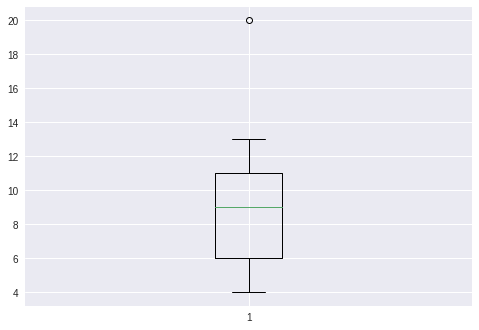

In [110]:
#Gráfico de Boxplot.
print(plt.boxplot(df["Tempo_envio"]))

{'whiskers': [<matplotlib.lines.Line2D object at 0x7efce048dc10>, <matplotlib.lines.Line2D object at 0x7efce049b190>], 'caps': [<matplotlib.lines.Line2D object at 0x7efce049b6d0>, <matplotlib.lines.Line2D object at 0x7efce049bc10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7efce048d610>], 'medians': [<matplotlib.lines.Line2D object at 0x7efce04a61d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7efce04a6710>], 'means': []}


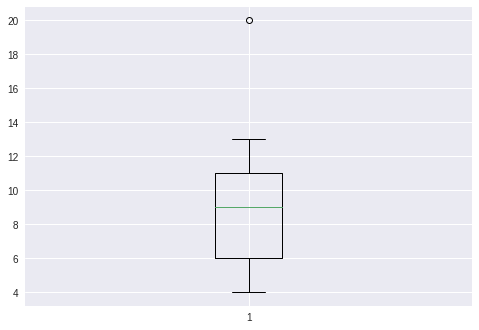

In [111]:
#Histograma.
print(plt.hist(df["Tempo_envio"]))

In [112]:
#Tempo mínimo de envio.
print(df["Tempo_envio"].min())

4


In [ ]:
#Tempo max de envio.
print(df["Tempo_envio"].max())

In [113]:
#Identificando o Outlier.
print(df[df["Tempo_envio"] == 20])

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

        Custo Unitário       Preço Unitário  Quantidade       Valor Desconto  \
0               348.58               758.00           6                 0.00   

           Valor Venda                                Produto  \
0             4,548.00  Adventure Works Laptop15.4W M1548 Red   

        Fabricante            Marca   Classe  Cor                custo  \
0  Adventure Works  Adventure Works  Regular  Red             2,091.48   

                 lucro Tempo-envio  Tempo_envio  
0             2,456.52     20 days           20  


In [114]:
df.to_csv("df_vendas_novo_csv", index=Falses)